# _Astronomy (Star Type)_

#### Introducción a la ciencia de datos

#### Práctica 2

##### Alumna: Cielo Aholiva Higuera Gutiérrez

###### El estudio de las estrellas es fundamental para comprender el universo y su evolución. Este conjunto de datos se centra en varias propiedades clave de las estrellas, que son esenciales para investigar su naturaleza y clasificación. A continuación, se describen las características más relevantes incluidas en el dataframe:

###### _Temperatura (K):_ Profundiza en las propiedades térmicas de las estrellas, cruciales para entender su ciclo de vida y producción de energía.

###### _Luminosidad (L/Lo):_ Explora el brillo estelar en relación con nuestro Sol (Lo = 3.828 x 10^26 vatios), lo que ofrece información sobre el tamaño de la estrella y su producción de energía.

###### _Radio (R/Ro):_ Compara los tamaños de las estrellas con nuestro Sol (Ro = 6.995 x 10^8 m), esencial para comprender la evolución y estructura estelar.

###### _Magnitud Absoluta (Mv):_ Analiza el brillo intrínseco de las estrellas, estandarizado para estudios comparativos a través de vastas distancias cósmicas.

###### _Tipo de Estrella:_ Clasifica los objetos celestes en seis clases ( (0-Brown Dwarf, 1-Red Dwarf, 2-White Dwarf, 3-Main Sequence, 4-Supergiants, 5-Hypergiants), ideal para tareas de clasificación.

###### _Color de la Estrella:_ Visualiza el espectro de colores estelares, proporcionando pistas sobre la temperatura y composición.

###### _Clase Espectral:_ Examina las firmas visuales de las estrellas, ofreciendo información sobre su composición química y etapa evolutiva.

###### Este conjunto de datos, al integrar estas variables, ofrece un recurso invaluable para el estudio de la astronomía. Permite aplicar diversas técnicas estadísticas y de aprendizaje automático para profundizar en la comprensión de las estrellas y su clasificación en el vasto universo.

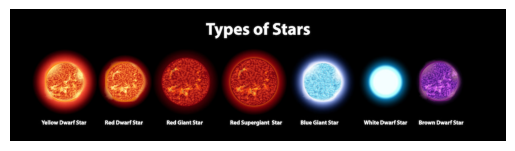

In [332]:
import matplotlib.image as mpimg
star = mpimg.imread('star_type.jpg')
fig, ax = plt.subplots()
ax.imshow(star)
ax.axis('off')
plt.show()

##### Import libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("cleaned_star_data.csv")

In [103]:
df.head(5)

,Temperature(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class,Radius
0,3042.0,0.000500,0.154200,16.60,0,Red,M,0.154200
1,2600.0,0.000300,0.102000,18.70,0,Red,M,0.102000
2,2800.0,0.000200,238.393907,16.65,0,Red,M,238.393907
3,1939.0,0.000138,0.103000,20.06,0,Red,M,0.103000
4,2840.0,107266.981895,0.110000,16.98,0,Red,M,0.110000


In [161]:
print(df_cleaned.info())
# Caracteristicas del data frame
print(df_cleaned.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 238
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature(K)          220 non-null    float64
 1   Luminosity(L/Lo)        220 non-null    float64
 2   Radius(R/Ro)            220 non-null    float64
 3   Absolute_magnitude(Mv)  220 non-null    float64
 4   Star_type               220 non-null    int64  
 5   Star_color              220 non-null    object 
 6   Spectral_Class          220 non-null    object 
 7   Radius                  220 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 15.5+ KB
None
       Temperature(K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute_magnitude(Mv)  \
count      220.000000        220.000000    220.000000              220.000000   
mean     10652.909091     107507.660996    233.769933                4.366477   
std       9641.972043     182529.665265    515.313833       

In [107]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :', cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :' ,num_col)

Categorical columns : ['Star_color', 'Spectral_Class']
Numerical columns : ['Temperature(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute_magnitude(Mv)', 'Star_type', 'Radius']


In [109]:
df[cat_col].nunique() # Cuantas variables tiene cada uno.

Star_color        6
Spectral_Class    8
dtype: int64

In [41]:
df

,Temperature(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class,Radius
0,3042.0,0.000500,0.1542,16.60,0,Red,M,0.1542
1,2600.0,0.000300,0.1020,18.70,0,Red,M,0.1020
2,2800.0,0.000200,NaN,16.65,0,Red,M,NaN
3,1939.0,0.000138,0.1030,20.06,0,Red,M,0.1030
4,2840.0,NaN,0.1100,16.98,0,Red,M,0.1100
...,...,...,...,...,...,...,...,...
234,38940.0,374830.000000,1356.0000,-9.93,5,Blue,O,1356.0000
235,30839.0,834042.000000,1194.0000,-10.63,5,Blue,O,1194.0000
236,8829.0,537493.000000,1423.0000,-10.73,5,White,A,1423.0000
237,9235.0,404940.000000,1112.0000,-11.23,5,White,A,1112.0000


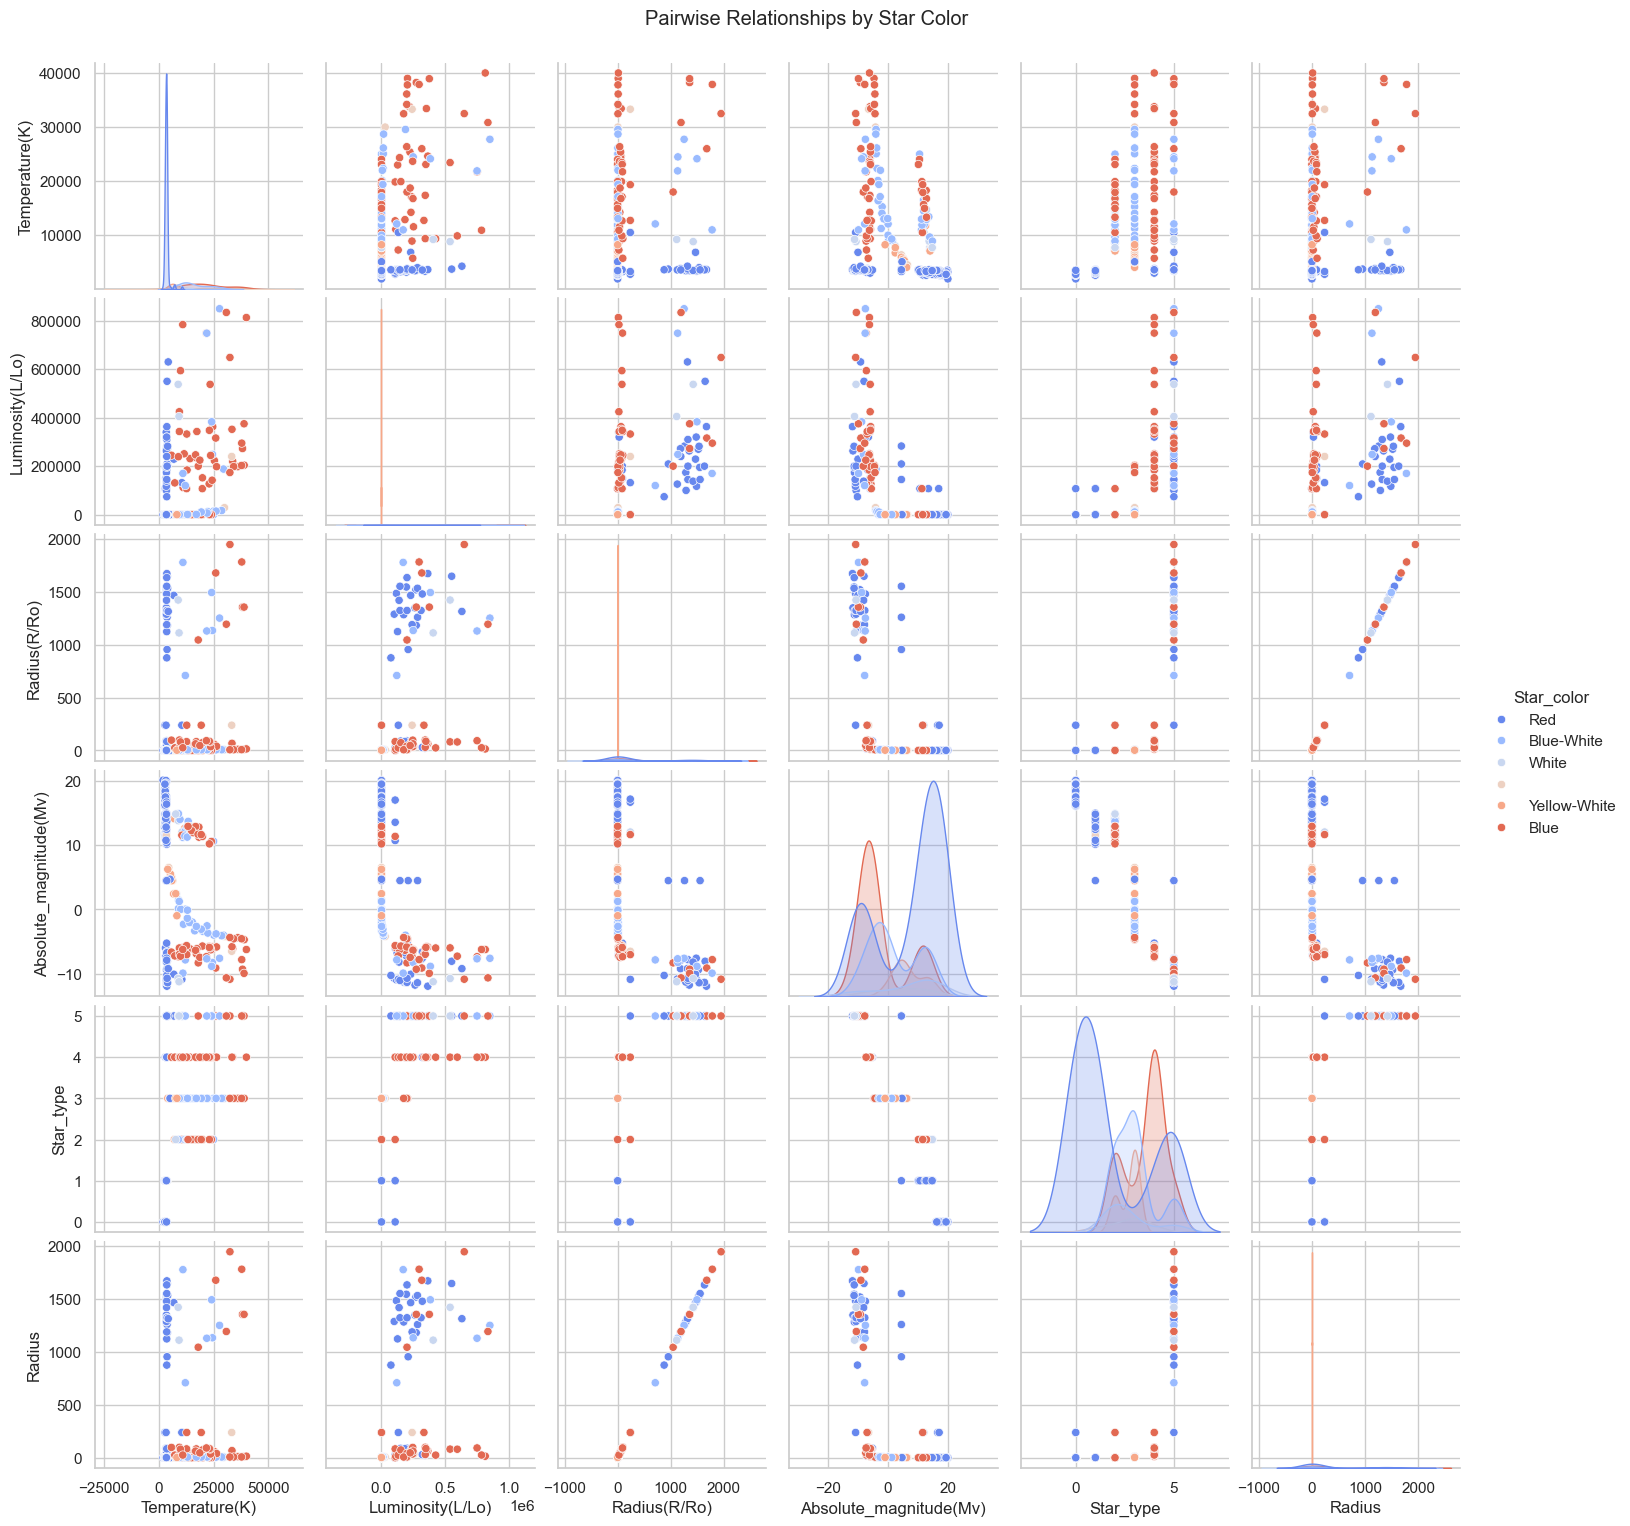

In [188]:
# Relación entre Color de estrella
sns.pairplot(df, hue='Star_color', palette='coolwarm')
plt.suptitle('Pairwise Relationships by Star Color', y=1.02)
plt.show()

### Análisis estadístico

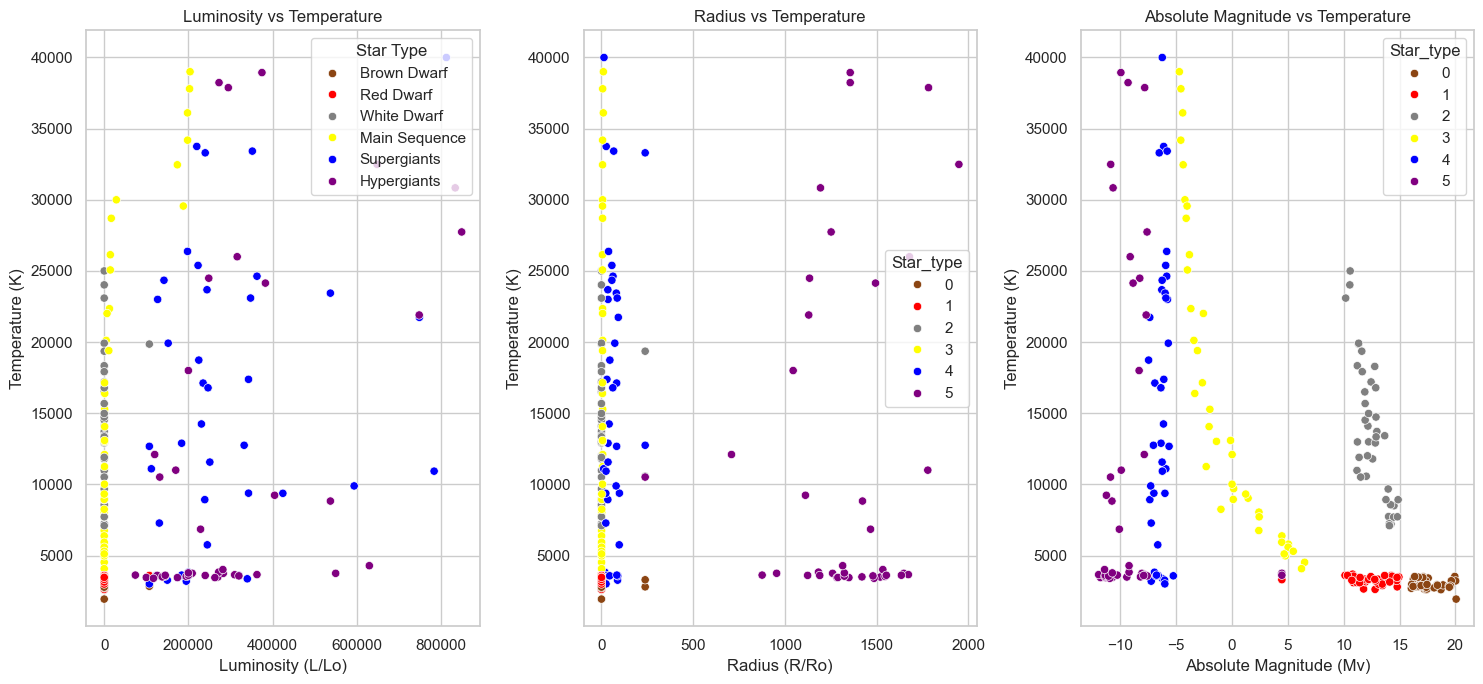

In [172]:
star_types = {0: 'Brown Dwarf', 1: 'Red Dwarf', 2: 'White Dwarf', 3: 'Main Sequence', 4: 'Supergiants', 5: 'Hypergiants'}
colors = {0: 'saddlebrown', 1: 'red', 2: 'gray', 3: 'yellow', 4: 'blue', 5: 'purple'}
df['Color'] = df['Star_type'].map(colors)
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

# Gráfico de Luminosidad vs. Temperatura
sns.scatterplot(data=df, x='Luminosity(L/Lo)', y='Temperature(K)', hue='Star_type', palette=colors, ax=axs[0])
axs[0].set_title('Luminosity vs Temperature')
axs[0].set_xlabel('Luminosity (L/Lo)')
axs[0].set_ylabel('Temperature (K)')

# Gráfico de Radio vs. Temperatura
sns.scatterplot(data=df, x='Radius(R/Ro)', y='Temperature(K)', hue='Star_type', palette=colors, ax=axs[1])
axs[1].set_title('Radius vs Temperature')
axs[1].set_xlabel('Radius (R/Ro)')
axs[1].set_ylabel('Temperature (K)')

# Gráfico de Magnitud Absoluta vs. Temperatura
sns.scatterplot(data=df, x='Absolute_magnitude(Mv)', y='Temperature(K)', hue='Star_type', palette=colors, ax=axs[2])
axs[2].set_title('Absolute Magnitude vs Temperature')
axs[2].set_xlabel('Absolute Magnitude (Mv)')
axs[2].set_ylabel('Temperature (K)')

# Leyenda
handles, labels = axs[0].get_legend_handles_labels()
new_labels = [star_types[int(label)] for label in labels]
axs[0].legend(handles, new_labels, title="Star Type", loc='upper right')

plt.tight_layout()
plt.show()

##### Temperatura (K) vs Luminosidad (L/Lo)

###### Las estrellas cafeces y las estrellas rojas rojas suelen tener baja luminosidad y baja temperatura.
###### Las estrellas blancas (puntos grises) generalmente tienen una menor luminosidad pero una mayor temperatura.
###### Las estrellas Main Sequence (puntos amarillos) siguen principalmente un patrón claro, donde temperaturas más altas corresponden a luminosidades más altas.
###### Las supergigantes (azules) y las hipergigantes (moradas) son generalmente más luminosas, pero muestran una mayor dispersión en temperatura.

##### Temperatura (K) vs Radio (L/Lo)

###### Las estrellas de Main Sequence nuevamente siguen un patrón de aumento de radio con el aumento de temperatura.
###### Las estrellas supergigantes y las hipergigantes tienen radios mucho más grandes, pero están distribuidas en un amplio rango de temperaturas.
###### Las estrellas blancas muestran radios pequeños a pesar de sus altas temperaturas.
###### Las estrellas rojas y marrones tienen bajas temperaturas y radios pequeños, agrupándose en la parte inferior izquierda.

##### Temperatura (K) vs Magnitud Absoluta (Mv)

###### Las estrellas de Main Sequence están bien distribuidas con una fuerte correlación negativa: las estrellas con temperaturas más altas tienden a tener magnitudes más bajas (más brillantes).
###### Las estrellas supergigantes y las hipergigantes tienen magnitudes muy brillantes y un amplio rango de temperaturas.
###### Las estrellas blancas tienen magnitudes absolutas relativamente altas (tenues) a pesar de sus altas temperaturas.
###### Las estrellas rojas y marrones se agrupan en la parte inferior derecha, teniendo bajas temperaturas y altas magnitudes absolutas (tenues).

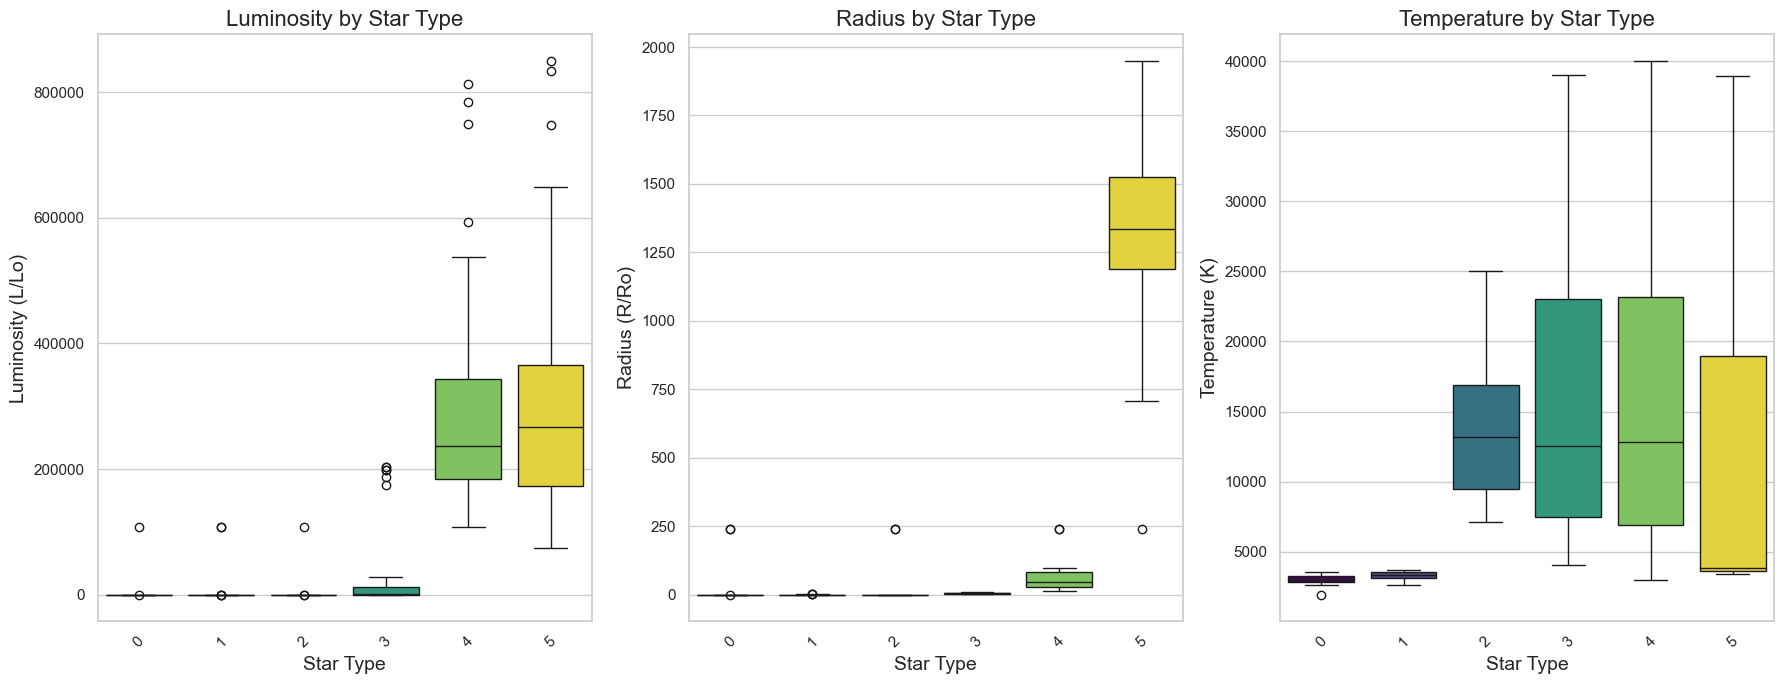

In [186]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(18, 7))

# Gráfico de Luminosidad
sns.boxplot(data=df, x='Star_type', y='Luminosity(L/Lo)', ax=axs[0], hue='Star_type', palette='viridis', legend=False)
axs[0].set_title('Luminosity by Star Type', fontsize=16)
axs[0].set_xlabel('Star Type', fontsize=14)
axs[0].set_ylabel('Luminosity (L/Lo)', fontsize=14)
axs[0].tick_params(axis='x', rotation=45)

# Gráfico de Radio
sns.boxplot(data=df, x='Star_type', y='Radius(R/Ro)', ax=axs[1], hue='Star_type', palette='viridis', legend=False)
axs[1].set_title('Radius by Star Type', fontsize=16)
axs[1].set_xlabel('Star Type', fontsize=14)
axs[1].set_ylabel('Radius (R/Ro)', fontsize=14)
axs[1].tick_params(axis='x', rotation=45)

# Gráfico de Temperatura
sns.boxplot(data=df, x='Star_type', y='Temperature(K)', ax=axs[2], hue='Star_type', palette='viridis', legend=False)
axs[2].set_title('Temperature by Star Type', fontsize=16)
axs[2].set_xlabel('Star Type', fontsize=14)
axs[2].set_ylabel('Temperature (K)', fontsize=14)
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### _Luminosidad (L/Lo) vs Star Type (Gráfico Izquierdo)_

###### Las estrellas marrones, Las estrellas rojas y las estrellas blancas: Estas estrellas tienen una luminosidad muy baja, con una variación mínima. Hay valores atípicos visibles, pero en general están agrupadas cerca de cero.
###### Estrellas de Main Sequence: Muestran un aumento moderado en luminosidad, pero aún mucho más bajo que las Supergigantes y las Hipergigantes. La variación es mucho mayor en comparación con las enanas.
###### Supergigantes y Hipergigantes: Tienen valores de luminosidad significativamente más altos, con algunos valores atípicos extremos que alcanzan luminosidades aún mayores. Las Hipergigantes, en particular, muestran un rango muy amplio en luminosidad.

##### _Radio (R/Ro) vs Star Type (Gráfico del Medio)_

###### Las estrellas marrones, Las estrellas rojas y las estrellas blancas: Todas muestran radios muy pequeños, agrupándose cerca de la parte inferior, similar a su baja luminosidad.
###### Estrellas de Main Sequence: Muestran un ligero aumento en el radio, pero siguen siendo significativamente más pequeñas que las Supergigantes y las Hipergigantes.
###### Supergigantes y especialmente Hipergigantes: Tienen radios enormes, con las Hipergigantes mostrando una mayor dispersión, lo que indica que las Hipergigantes pueden variar mucho en tamaño.

##### _Temperatura (K) vs Star Type (Gráfico Derecho)_

###### Las estrellas marrones, Las estrellas rojas y las estrellas blancas: Estas estrellas tienen temperaturas bajas, siendo las Enanas Blancas las más calientes entre estas categorías. La dispersión de temperatura es relativamente estrecha.
###### Estrellas de Main Sequence: Muestran un rango más amplio de temperaturas, con algunas estrellas alcanzando temperaturas muy altas en comparación con las enanas.
###### Supergigantes y Hipergigantes: Estas estrellas exhiben un amplio rango de temperaturas, con las Supergigantes generalmente mostrando más variabilidad. Algunas pueden ser tan calientes como las estrellas de la Secuencia Principal, mientras que otras son mucho más frías.

##### _Conclusiones generales_

###### Las estrellas (Marrones, Rojas y Blancas) tienden a tener baja luminosidad, radios pequeños y temperaturas bajas a moderadas.
###### Las estrellas de Main  Sequence son más moderadas en todas las características, pero muestran patrones claros de aumento en luminosidad, radio y temperatura en comparación con las estrellas (Marrones, Rojas y Blancas).
###### Las Supergigantes y las Hipergigantes son las estrellas más grandes y brillantes, con una variación significativa en tamaño y temperatura. Tienen una mayor dispersión en luminosidad, radios masivos y temperaturas variables.

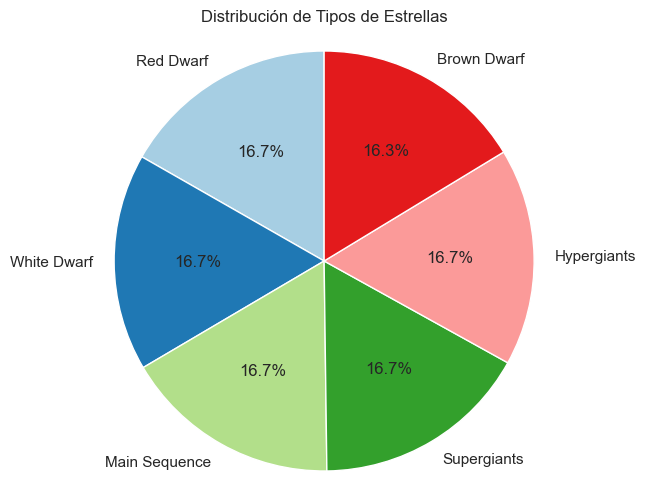

In [351]:
star_counts = df['Star_type'].value_counts()

star_labels = {0: 'Brown Dwarf', 1: 'Red Dwarf', 2: 'White Dwarf', 3: 'Main Sequence', 4: 'Supergiants', 5: 'Hypergiants'}
labels = [star_labels[int(i)] for i in star_counts.index]
plt.figure(figsize=(8, 6))
plt.pie(star_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de Tipos de Estrellas')
plt.axis('equal')
plt.show()

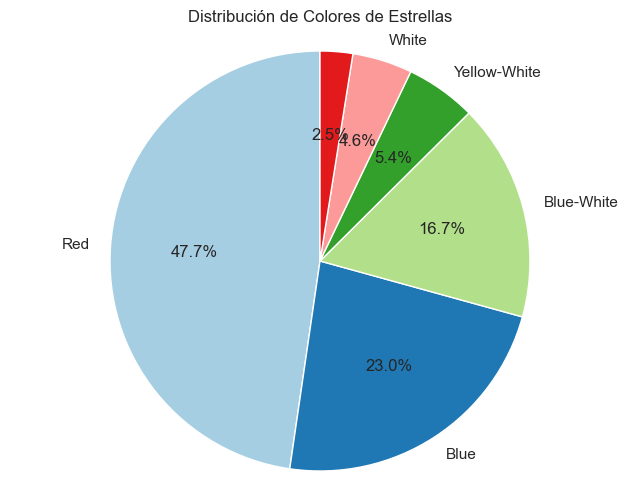

In [359]:
color_counts = df['Star_color'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de Colores de Estrellas')
plt.axis('equal')  # Para que el pastel sea un círculo
plt.show()

### Limpieza de datos

In [111]:
mapping_star_color = {'Red': 0,'Blue-White': 1,'White': 2,'Yellow-White': 3,' ': 4,  # Espacio en blanco
                      'Blue': 5}

mapping_spectral_class = {'M': 0,'B': 1,'A': 2,'F': 3,'O': 4,' ': 5,  # Espacio en blanco
    'K': 6,'G': 7}

print(mapping_star_color)
print(mapping_spectral_class)

{'Red': 0, 'Blue-White': 1, 'White': 2, 'Yellow-White': 3, ' ': 4, 'Blue': 5}
{'M': 0, 'B': 1, 'A': 2, 'F': 3, 'O': 4, ' ': 5, 'K': 6, 'G': 7}


In [166]:
# Calcular la media de las columnas numéricas
mean_values = df.select_dtypes(include=[np.number]).mean()

# Reemplazar NaN en columnas numéricas con la media
df.fillna(mean_values, inplace=True)

# Establecer NaN en columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_columns] = df[non_numeric_columns].where(df[non_numeric_columns].notnull(), np.nan)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature(K)          239 non-null    float64
 1   Luminosity(L/Lo)        239 non-null    float64
 2   Radius(R/Ro)            239 non-null    float64
 3   Absolute_magnitude(Mv)  239 non-null    float64
 4   Star_type               239 non-null    int64  
 5   Star_color              239 non-null    object 
 6   Spectral_Class          239 non-null    object 
 7   Radius                  239 non-null    float64
 8   Color                   239 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 16.9+ KB
None


In [168]:
df

,Temperature(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type,Star_color,Spectral_Class,Radius,Color
0,3042.0,0.000500,0.154200,16.60,0,Red,M,0.154200,saddlebrown
1,2600.0,0.000300,0.102000,18.70,0,Red,M,0.102000,saddlebrown
2,2800.0,0.000200,238.393907,16.65,0,Red,M,238.393907,saddlebrown
3,1939.0,0.000138,0.103000,20.06,0,Red,M,0.103000,saddlebrown
4,2840.0,107266.981895,0.110000,16.98,0,Red,M,0.110000,saddlebrown
...,...,...,...,...,...,...,...,...,...
234,38940.0,374830.000000,1356.000000,-9.93,5,Blue,O,1356.000000,purple
235,30839.0,834042.000000,1194.000000,-10.63,5,Blue,O,1194.000000,purple
236,8829.0,537493.000000,1423.000000,-10.73,5,White,A,1423.000000,purple
237,9235.0,404940.000000,1112.000000,-11.23,5,White,A,1112.000000,purple


### Selección de características

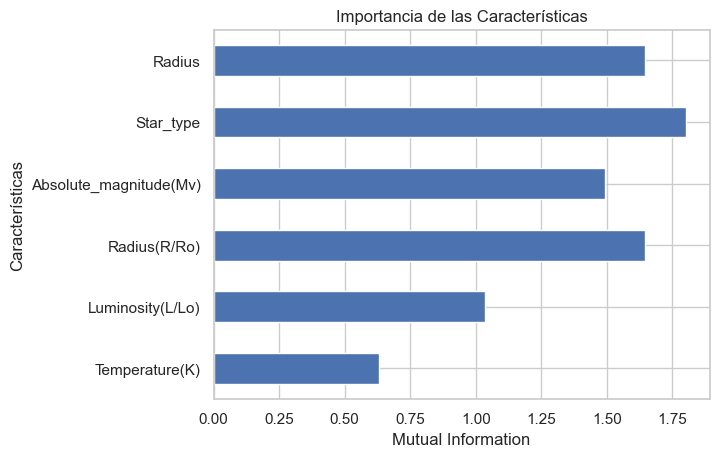

Execution time: 0.05 seconds


In [305]:
X = df.select_dtypes(include=[np.number])
y = df['Star_type']

if len(X) != len(y):
    raise ValueError("Las longitudes de X e y no coinciden.")

# Start time
start_time_forward = time.time()
X_new = mutual_info_classif(X, y)

# End time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

feat_imp = pd.Series(X_new, index=X.columns)
feat_imp.plot(kind='barh')
plt.title('Importancia de las Características')
plt.xlabel('Mutual Information')
plt.ylabel('Características')
plt.show()
print(f"Execution time: {time_forward:.2f} seconds")

##### A partir del gráfico, se puede observar que las características más importantes en la clasificación de los tipos de estrellas son las variables proporcionadas por el DataFrame: Temperatura (K), Luminosidad (L/Lo), Radio (R/Ro) y Magnitud Absoluta (Mv). Estas variables desempeñan un papel crucial en la caracterización de las estrellas y su evolución. La temperatura (K) influye en el color y la luminosidad de las estrellas, lo que es fundamental para clasificar su tipo espectral, mientras que la luminosidad (L/Lo) relacionada con el tamaño y la energía que emite la estrella, proporciona información clave sobre su ciclo de vida y estado evolutivo, el radio (R/Ro) compara el tamaño de las estrellas con el Sol, permitiendo una mejor comprensión de su estructura y fases de evolución, y por último la magnitud Absoluta (Mv) proporciona una medida del brillo intrínseco de las estrellas, estandarizando las comparaciones a través de vastas distancias cósmicas.

##### Low variance

In [200]:
from sklearn.feature_selection import VarianceThreshold

# start time
start_time_forward = time.time()

### Applying feature selection method
sel = VarianceThreshold(threshold=0.16)
sel.fit_transform(X)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = sel.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Temperature(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute_magnitude(Mv)', 'Star_type', 'Radius']
Execution time: 0.00 seconds


##### Univariate feature selection

In [203]:
from sklearn.feature_selection import SelectKBest, f_classif

# start time
start_time_forward = time.time()

### Applying feature selection method
select_kbest = SelectKBest(score_func=f_classif, k=5)  # change k
select_kbest.fit_transform(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = select_kbest.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute_magnitude(Mv)', 'Star_type', 'Radius']
Execution time: 0.13 seconds


D:\Documentos\PHYTON\Phyton programa\1 CSharp\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


#### Correlation coefficient

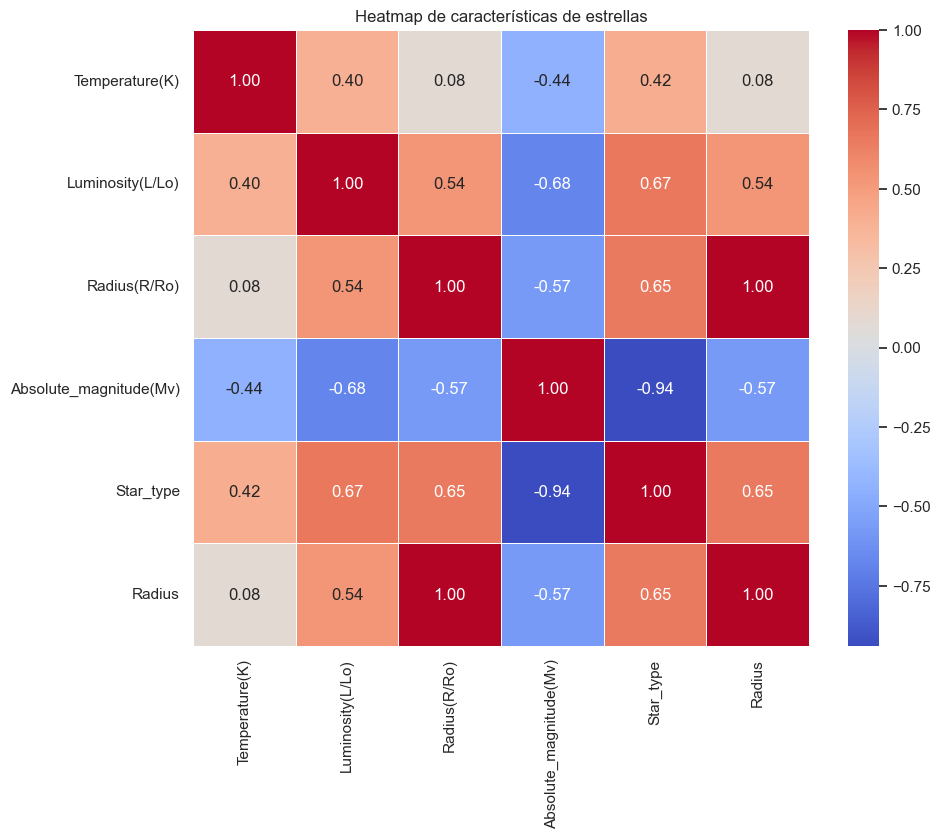

In [212]:
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Heatmap de características de estrellas')
plt.show()

##### A partir del heapmap, se puede observar que existe muy buena correlación entre diferentes variables que caracterizan a las estrellas, por ejemplo, la Luminisidad se relaciona con el Radio, tipo de estrella, así mismo la magnitud absoluta se relaciona con en el radio y la Luminosidad.

#### Forward selection

In [230]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [233]:
# start time
start_time_forward = time.time()

### Applying feature selection method
ffs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward')
ffs.fit(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = ffs.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['Temperature(K)', 'Luminosity(L/Lo)', 'Star_type']
Execution time: 0.18 seconds


#### Exhaustive feature selection

In [236]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

# start time
start_time_forward = time.time()

### Applying feature selection method
efs = ExhaustiveFeatureSelector(RandomForestClassifier(), min_features=1, max_features=4) #change max_features
efs = efs.fit(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
print('The selected features are:', efs.best_feature_names_)

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

Features: 56/56

The selected features are: ('Star_type',)
Execution time: 53.24 seconds


#### LASSO regularization (L1)

D:\Documentos\PHYTON\Phyton programa\1 CSharp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.611e-01, tolerance: 6.937e-02
  model = cd_fast.enet_coordinate_descent(


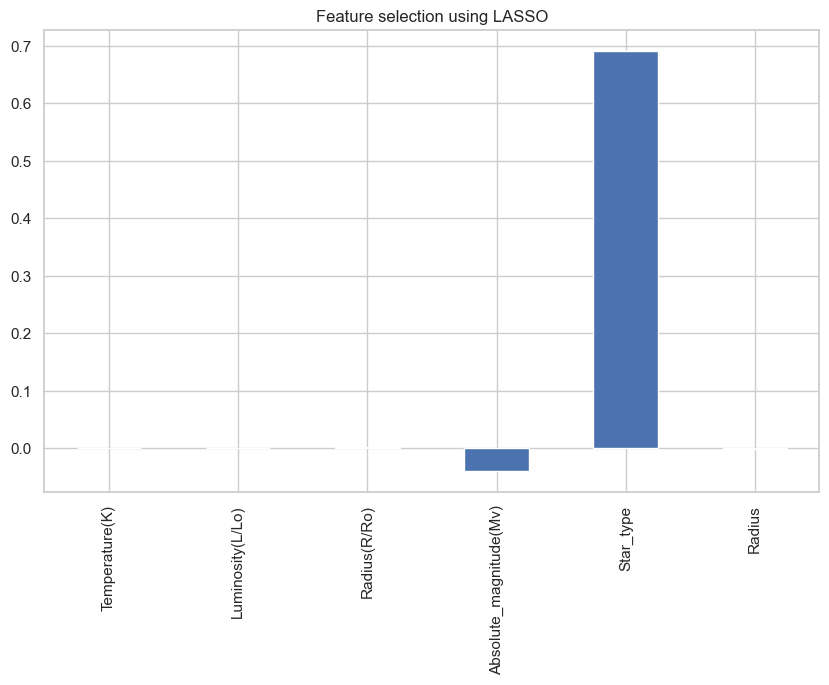

Execution time: 0.11 seconds


In [239]:
from sklearn.linear_model import Lasso

# start time
start_time_forward = time.time()

### Applying feature selection method
lasso = Lasso(alpha=0.1)  # adjust alpha
lasso.fit(X, y)

# end time
end_time_forward = time.time()
time_forward = end_time_forward - start_time_forward

# show feature selection
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(10, 6))
lasso_coef.plot(kind='bar')
plt.title('Feature selection using LASSO')
plt.show()

# show elapsed time of this method
print(f"Execution time: {time_forward:.2f} seconds")

#### Reducción de dimensionalidad

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.preprocessing import StandardScaler, LabelEncoder

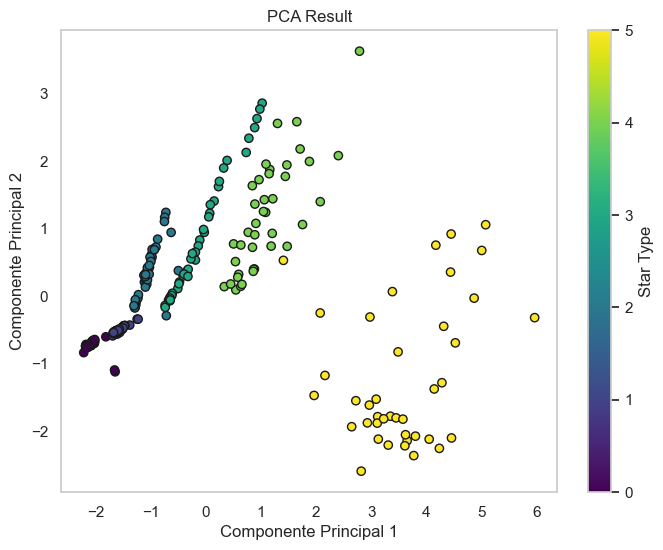

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

for col in ['Temperature(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute_magnitude(Mv)', 'Radius']:
    df[col] = pd.to_numeric(df[col], errors='coerce') 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# 6. Visualizar PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Star_type'], cmap='viridis', edgecolor='k')
plt.title('PCA Result')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Star Type')
plt.grid()
plt.show()

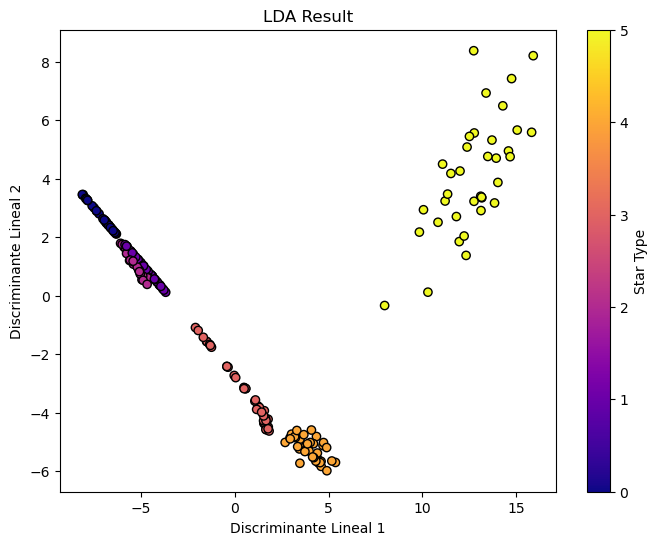

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

for col in ['Temperature(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute_magnitude(Mv)', 'Radius']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  


df_cleaned = df.dropna()

X = df_cleaned.drop(columns=['Star_type', 'Star_color', 'Spectral_Class'])
y = df_cleaned['Star_type'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Aplicar LDA
lda = LinearDiscriminantAnalysis(n_components=len(set(y)) - 1)  # n_components debe ser <= n_classes - 1
X_lda = lda.fit_transform(X_scaled, y)

# 6. Visualizar LDA
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='plasma', edgecolor='k')
plt.title('LDA Result')
plt.xlabel('Discriminante Lineal 1')
plt.ylabel('Discriminante Lineal 2')
plt.colorbar(label='Star Type')
plt.show()

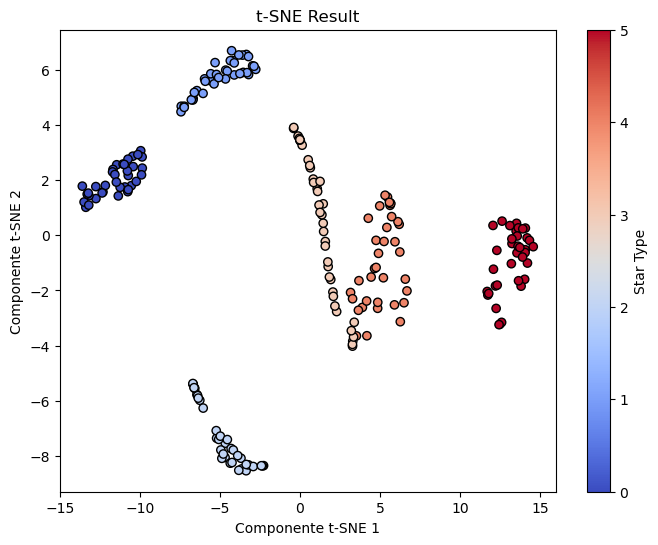

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

for col in ['Temperature(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute_magnitude(Mv)', 'Radius']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  

df_cleaned = df.dropna()

X = df_cleaned.drop(columns=['Star_type', 'Star_color', 'Spectral_Class']) 
y = df_cleaned['Star_type'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# 6. Visualizar t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('t-SNE Result')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.colorbar(label='Star Type')
plt.show()

D:\Documentos\PHYTON\Phyton programa\1 CSharp\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


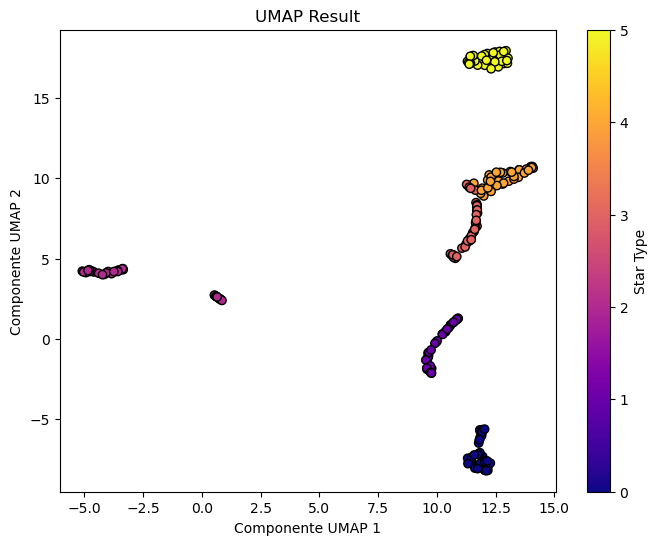

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler

for col in ['Temperature(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute_magnitude(Mv)', 'Radius']:
    df[col] = pd.to_numeric(df[col], errors='coerce') 

df_cleaned = df.dropna()

X = df_cleaned.drop(columns=['Star_type', 'Star_color', 'Spectral_Class']) 
y = df_cleaned['Star_type'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='plasma', edgecolor='k')
plt.title('UMAP Result')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar(label='Star Type')
plt.show()

##### La reducción de dimensionalidad es una técnica fundamental en análisis de datos, especialmente en contextos donde se trabaja con conjuntos de datos de alta dimensionalidad, como en el caso de características de estrellas, por lo que se aplicó PCA, LDA, t-SNE y UMAP, en donde cada una de las técnicas aplicada proporcionó diferentes características. Por ejemplo, PCA puede ayudar a entender la variación general, LDA puede enfocar la clasificación, y t-SNE y UMAP pueden proporcionar visualizaciones intuitivas de cómo los tipos de estrellas se agrupan.

#### Conclusiones generales

##### La reducción de dimensionalidad es una herramienta para el análisis de datos astronómicos, especialmente para la clasificación de estrellas. Las técnicas como UMAP pueden proporcionar una visualización clara y efectiva, permitiendo a los investigadores hacer inferencias sobre la estructura de los datos y la relación entre las diferentes características y tipos de estrellas.

##### La selección de características ayuda a identificar cuáles variables son más influyentes en la clasificación y comportamiento de las estrellas. Esto proporciona una comprensión más clara de los factores que afectan su evolución y propiedades.

##### Las herramientas estadísticas permiten identificar relaciones significativas entre las características de las estrellas y su tipo. Por ejemplo, una estrella más caliente (alta temperatura) puede estar asociada con una mayor luminosidad.

##### En conclusión, la combinación de técnicas de reducción de dimensionalidad y la clasificación puede mejorar la capacidad para predecir el tipo de estrella basado en sus características observadas.

##### Refrencias bibliográficas

###### * Bressan, A., et al. (2019). "The Stellar Evolution Code: From the Main Sequence to the Red Giant Branch." Monthly Notices of the Royal Astronomical Society, 482(2), 1977-1993.
###### * Gaia Collaboration. (2021). "Gaia Data Release 2: Summary of the contents and survey properties." Astronomy & Astrophysics, 649, A1.